[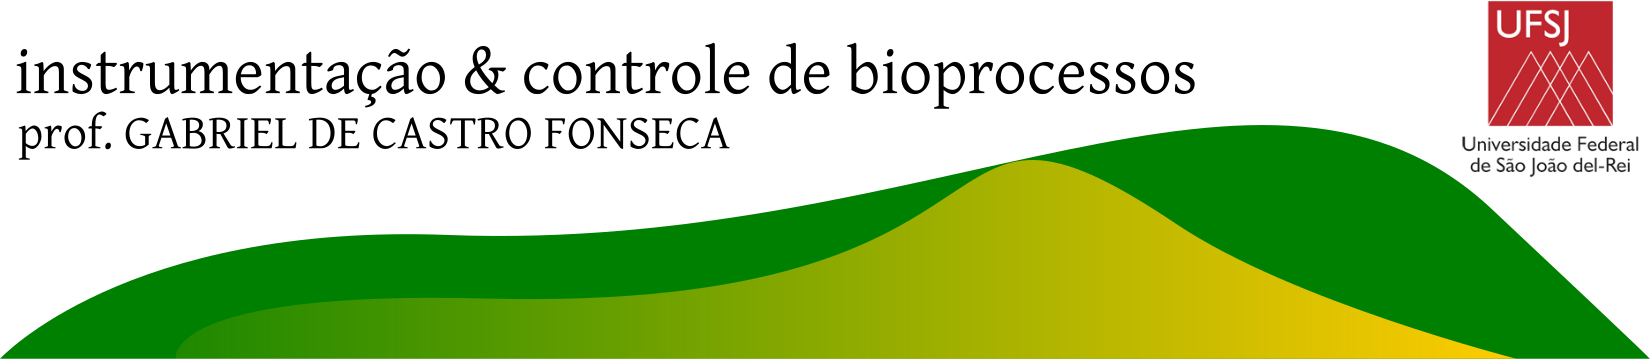](Aulas-Sumário.ipynb)

# Análise de Resposta em Frequência

*Prof. Gabriel de Castro Fonseca (DQBIO/UFSJ)*<br>
*Instrumentação e Controle de Bioprocessos*

Este documento é publicado sob os termos da licença [GNU General Public Licence 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

## Estabilidade relativa

[Na última aula](estabilidade.ipynb) estudamos um modo de avaliar as condições necessárias para garantir a estabilidade de um sistema de controle por realimentação a partir da análise das raízes características da função de transferência em malha fechada.

Há dois tipos de estabilidade que devem ser discutidos, contudo. O que discutimos na aula passada foi a **estabilidade absoluta**, um conceito utilizado para classificar um sistema apenas como estável ou instável.

Na aula de hoje introduziremos o conceito de **estabilidade relativa** ou **robustez** do sistema. Esse conceito é importante porque os modelos que usamos para projetar um sistema de controle têm algum grau de incerteza decorrente de aproximações, linearizações ou medidas imprecisas. 

Vamos definir certos indicadores que nos permitirão estimar o quanto um sistema de controle pode tolerar essas incertezas sem se tornar instável. Para defini-los, no entanto, precisamos introduzir o conceito de resposta em frequência.

## Resposta em Frequência

A resposta em frequência de um sistema dinâmico é definida como a sua resposta permanente (solução particular) ao sofrer um estímulo senoidal ou cossenoidal.

### Exemplo: sistema capacitivo em malha aberta

$$
    \tau \dot y + y = K \cdot \underbrace{( a\cdot {\rm sen} \omega t \cdot \mathbf{1^+}(t) )}_{u(t)}
$$

A solução particular para esse problema seria $y_P(t) = A \cos \omega t + B {\;\rm sen} \omega t$. 

Substituindo $y_P$ na EDO:

\begin{gather*}
    \tau (-A\omega{\;\rm sen}\omega t + B\omega\cos \omega t) + A \cos \omega t + B {\;\rm sen} \omega t = aK {\;\rm sen} \omega t \\
    (-A\omega\tau + B) {\;\rm sen}\omega t + (B\omega\tau + A)\cos \omega t = aK {\;\rm sen} \omega t \\
    \implies A = \frac{-aK\omega\tau}{1+\omega^2\tau^2}\;;\quad B = \frac{aK}{1+\omega^2\tau^2} \\
    y_P(t) = \frac{aK}{1+\omega^2\tau^2}(-\omega\tau\cos\omega t + {\;\rm sen \omega t}) \\
    y_P(t) = \frac{aK}{\sqrt{1+\omega^2\tau^2}}\bigg(\underbrace{-\frac{\omega\tau}{\sqrt{1+\omega^2\tau^2}}}_{\rm sen \phi}\cos\omega t + \underbrace{\frac{1}{\sqrt{1+\omega^2\tau^2}}}_{\cos \phi}{\;\rm sen \omega t}\bigg) \\
    \boxed{
    y_P(t) = \frac{aK}{\sqrt{1+\omega^2\tau^2}} {\;\rm sen}(\omega t + \phi)\;;\quad\phi = {\rm tg^{-1}}(-\omega\tau)
    }
\end{gather*}

Ou seja, para um estímulo senoidal $u(t) = a{\;\rm sen \omega t}$, a resposta permanente do sistema seria outra senoidal $y(t) = \frac{aK}{\sqrt{1+\omega^2\tau^2}} {\;\rm sen}(\omega t + \phi)$.

A resposta permanente tem exatamente a mesma frequência que o estímulo, $\omega$. Há dois elementos diferentes no entanto: a amplitude da senoide ($a$ no estímulo e $\frac{aK}{\sqrt{1+\omega^2\tau^2}}$ na resposta) e o ângulo de fase $\phi$ na resposta.

O gráfico abaixo compara estímulo e resposta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def estim(t,ω):
    return np.sin(ω*t)

def resp(t,ω):
    ϕ = np.arctan(-ω) 
    return 1/np.sqrt(1+ω**2)*np.sin( ω*t + ϕ ), ϕ

def principal(ω):
    t = np.linspace(0,60,151)
    u = estim(t,ω)
    y,ϕ = resp(t,ω)
    plt.rcParams["figure.figsize"]=[7,5]
    plt.rcParams.update({'font.size': 14})
    plt.plot(t,u, label = r"$\dfrac{u(t)}{a}$")
    plt.plot(t,y, label = r"$\dfrac{y(t)}{aK}$")
    plt.grid()
    plt.xlabel(r"tempo, $\dfrac{t}{\tau}$")
    plt.legend(loc = "upper right")
    plt.text(0,-0.9,f"$\phi = ${ϕ:.3f} radianos")
    
ω_widget = widgets.FloatSlider(min=0.1, max=2, step=0.2,
                               value=.1, description = r'$\omega$')
w = widgets.interact(principal, ω = ω_widget)
w.widget.children[-1].layout.height = '500px'
display(w)

interactive(children=(FloatSlider(value=0.1, description='$\\omega$', max=2.0, min=0.1, step=0.2), Output()), …

<function __main__.principal(ω)>

A razão entre a amplitude da resposta e a do estímulo é um parâmetro importante para análise chamada de **razão de amplitude** ($RA$). Para um sistema capacitivo,

\begin{equation}
    RA = \frac{K}{\sqrt{1+\omega^2\tau^2}}
\end{equation}

Outro parâmetro intimamente relacionado é a **razão de magnitude** ($RM$), definido como

\begin{equation}
    RM = \frac{RA}{K}
\end{equation}

Juntamente com o **ângulo de fase** ($\phi$), a razão de amplitude ou a de magnitude são os principais parâmetros que caracterizam a resposta em frequência.

Como mostrado acima, esses parâmetros podem ser encontrados a partir da resposta permanente ao estímulo senoidal. Os parâmetros podem ser encontrados também a partir da funçao de transferência através da substituição $s = j\omega$:

\begin{gather*}
    G(s) = \frac{K}{\tau s + 1} \\
    G(j\omega) = \frac{K}{j\omega\tau + 1} 
\end{gather*}

$G(j\omega) = z$ é um número complexo. Ele pode ser racionalizado e escrito na forma $a + jb$:

\begin{gather*}
    G(j\omega) = \frac{K}{1+j\omega\tau} \cdot \frac{1-j\omega\tau}{1-j\omega\tau} \\
    G(j\omega) = \underbrace{\frac{K}{1+\omega^2\tau^2}}_{a} + \underbrace{\left(- \frac{jK\omega\tau}{1+\omega^2\tau^2}\right)}_{j b}
\end{gather*}

Podemos escrever também na forma $\rho e^{j\theta}$, onde $\rho = |G(j\omega)|$ (módulo do número complexo) e $\theta = \angle G(j\omega)$ (ângulo entre o número e o eixo real no plano complexo).

\begin{gather*}
    |G(j\omega)| = \sqrt{ \frac{K^2(1+\omega^2\tau^2)}{(1+\omega^2\tau^2)^2} } \\
    |G(j\omega)| = \boxed{ RA = \frac{K}{\sqrt{1+\omega^2\tau^2}}    } \\
    \angle G(j\omega) = {\rm tg^{-1}}\left( \frac{- \frac{K\omega\tau}{1+\omega^2\tau^2}}{\frac{K}{1+\omega^2\tau^2}} \right) \\
    \angle G(j\omega) = \boxed{ \phi = {\rm tg}^{-1} (-\omega \tau)   }
\end{gather*}

Ou seja, podemos encontrar a razão de amplitude e o ângulo de fase de um sistema escrevendo sua função de transferência na forma

\begin{equation}
    \boxed{
    \boxed{
    G(j\omega) = RA \, e^{j\phi}
    } }
\end{equation}

Embora só tenhamos demonstrado essa identidade para um sistema capacitivo, é possível generalizá-la para qualquer sistema dinâmico linear. A tabela abaixo mostra as razões de amplitude e ângulos de fase associados a algumas funções de transferência comuns.

| Sistema |  $G(s)$ | $RA$ | $\phi$ |
| --- | :---: | :---: | :---: |
| Ganho puro | $K$ | $K$ | $0$ |
| Capacitivo | $\dfrac{K}{\tau s + 1}$ | $\dfrac{K}{\sqrt{1+\omega^2\tau^2}}$ | $-{\rm tg}^{-1}(\omega \tau)$ |
| Integrador | $\dfrac{k}{s}$ | $\dfrac{k}{\omega}$ | $-\dfrac{\pi}{2}$ | 
| 2ª ordem | $\dfrac{K}{\tau^2s^2+2\zeta\tau s + 1}$ | $\dfrac{K}{\sqrt{(1-\omega^2\tau^2)^2+(2\zeta\tau\omega)^2}}$ | ${-\rm tg}^{-1}\left(\dfrac{2\zeta\tau\omega}{1-\omega^2\tau^2}\right)$ |
| Tempo morto | $e^{-s\theta}$ | $1$ | $-\omega\theta$ |
| Avanço | $(\sigma s + 1)$ | $\sqrt{1+\omega^2\sigma^2}$ | $+{\rm tg}^{-1}(\omega\sigma)$ |
| PID ideal | $K_c\left(1+\frac{1}{\tau_Is} + \tau_D s\right)$ | $K_c \sqrt{ 1 + \left(-\frac{1}{\tau_I\omega}+\tau_D\omega\right)^2}$ | ${\rm tg}^{-1}\left(-\frac{1}{\tau_i\omega} + \tau_D\omega\right)$ |

### Função de transferência composta

Considere, por exemplo, um sistema com função de transferência

$$
    G(s) = \frac{K(\sigma s + 1)e^{-s\theta}}{\tau s + 1} = G_1(s)G_2(s)G_3(s)
$$

Trata-se de um sistema composto por um elemento capacitivo ($G_1(s)$), um elemento avanço ($G_2(s)$) e um elemento tempo morto ($G_3(s)$). Sua razão de amplitude e seu ângulo de fase podem ser encontrados fazendo:

\begin{gather*}
    G(s) = G_1(s) G_2(s) G_3(s) \\
    G(j\omega) = G_1(j\omega)G_2(j\omega)G_3(j\omega) \\
    RA \; e^{j\phi} = (RA_1\,e^{j\phi_1})(RA_2\,e^{j\phi_2})(RA_3\,e^{j\phi_3})  \\
    RA \; e^{j\phi} = RA_1RA_2RA_3\; e^{j(\phi_1+\phi_2+\phi_3)}
\end{gather*}

Podemos concluir portanto que, para nossa função de transferência,

\begin{gather*}
    RA = K\sqrt{ \frac{1+\omega^2\sigma^2}{1+\omega^2\tau^2} } \\
    \phi = {\rm tg}^{-1}(\omega\sigma) - {\rm tg}^{-1}(\omega\tau) - \omega\theta
\end{gather*}

## Diagramas de Bode

A razão de amplitude (ou magnitude) e o ângulo de fase são as características mais importantes da resposta em frequência. Esses dois parâmetros são funções da frequência do estímulo que atinge o sistema.

A dependência de $RA$ e $\phi$ em relação a $\omega$ costuma ser representada graficamente através do diagrama de Bode. Esse diagrama consiste de um par de gráficos, onde um relaciona a frequência do estímulo à razão de amplitude (ou magnitude) e outro relaciona a frequência ao ângulo de fase.

Abaixo alguns exemplos de diagrama de Bode são mostrados:

In [2]:
amort = np.array([0.1, 0.5, 1, 1.5]) # fatores de amortecimento

def rfreq(ω,tipo):
    """
    Retorna razão de amplitude e ângulo de fase considerando
    K = 1 e τ = 1 em função da frequência ω e para diferentes
    tipos de função de transferência.
    """
    RA = []
    ϕ = []
    if tipo == "capacitivo":
        return 1/np.sqrt(1+ω**2), np.arctan(-ω)
    elif tipo == "integrador":
        return 1/ω, -np.pi/2 * ω/ω
        # ω/ω é um vetor de 1's com tamanho de ω
    elif tipo == "2a ordem":
        for ζ in amort:
            RA += [1/np.sqrt( (1-ω**2)**2 + (2*ζ*ω)**2 )]
            ϕ  += [np.arctan2(-2*ζ*ω, (1-ω**2))]
        return RA, ϕ
    elif tipo == "tempo morto":
        return ω/ω, -ω
    elif tipo == "avanço":
        return np.sqrt(1+ω**2), np.arctan(ω)


def principal(tipo):
    ω = np.logspace(-2,2,201)
    RA, ϕ = rfreq(ω,tipo)
    plt.rcParams["figure.figsize"]=[8,6]
    plt.rcParams.update({'font.size': 14})
    if tipo == "2a ordem":
        plt.subplot(2,1,1)
        for i, ra in enumerate(RA):
            plt.loglog(ω,ra, label = f"$\zeta =$ {amort[i]:.1f}")
        plt.grid(which = "both")
        plt.legend()
        plt.ylabel("RM")
        plt.subplot(2,1,2)
        for j, a in enumerate(ϕ):
            a = a*180/np.pi
            plt.semilogx(ω,a, label = f"$\zeta =$ {amort[j]:.1f}")
        plt.grid(which = "both")
        plt.legend()
        plt.ylabel("ϕ, graus")
        plt.yticks(np.arange(-180, 10, 45))
    else:
        ϕ = ϕ*180/np.pi
        plt.subplot(2,1,1)
        plt.loglog(ω,RA)
        plt.grid(which="both")
        plt.ylabel("RM")
        plt.subplot(2,1,2)
        plt.semilogx(ω,ϕ)
        plt.grid(which="both")
        plt.ylabel("ϕ, graus")
    if tipo == "avanço":
        plt.yticks(np.arange(0, 100, 30))
    elif tipo == "tempo morto":
        plt.yticks(np.arange(-180, 10, 45))
        plt.ylim([-200,0])
    elif tipo == "capacitivo":
        plt.yticks(np.arange(-90, 10, 30))
    plt.xlabel(r"$\dfrac{\omega}{\tau}$, radianos/tempo")
    
    
tipo_widget = widgets.Dropdown( 
    options = ["capacitivo", "integrador", "2a ordem", "tempo morto", "avanço"],
    value="capacitivo", description = "Sistema:")
w = widgets.interact(principal, tipo = tipo_widget)
w.widget.children[-1].layout.height = '500px'
display(w)

interactive(children=(Dropdown(description='Sistema:', options=('capacitivo', 'integrador', '2a ordem', 'tempo…

<function __main__.principal(tipo)>

## Critério de estabilidade de Bode para malha fechada

Considere o sistema de controle simplificado mostrado na figura. Observe que a medida da variável resposta não está conectada à malha de realimentação, de forma que o próprio valor desejado é interpretado pelo controlador como um sinal de erro.

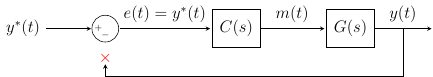

Suponha que o *set-point* varia conforme uma função senoidal, $y^*(t) = a\, {\rm sen}(\omega t)$ onde a frequência de oscilação $\omega$ é ajustável.

A resposta do sistema será uma outra função senoidal $y(t) = a\, RA\,{\rm sen}(\omega t + \phi) $, onde $RA$ e $\phi$ são funções de $\omega$.

Suponha que para algum valor de $\omega_\pi$ da frequência, $\phi = -\pi \rm\; rad$ (ou $-180°$). Nesse caso, 

\begin{gather*}
y(t) = - a\, RA\,{\rm sen}(\omega_\pi t) \\
\implies y(t) = - RA\, y^*(t)
\end{gather*}

Ou seja, a resposta do sistema seria igual ao estímulo, mas com sinal trocado e multiplicada pela razão de amplitude a essa frequência.

Suponha que após essa frequência $\omega_\pi$, chamada de **frequência de *crossover*** (cruzamento), ter sido encontrada, nós desconectamos o *set-point* do sistema e simultaneamente conectamos a resposta ao comparador, conforme a figura:

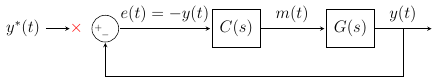

O sinal de erro recebido pelo controlador será $e(t) = -y(t) = RA \,y^*(t) $, ou seja, o mesmo estímulo que anteriormente, mas multiplicado pela razão de amplitude.

Se a razão de amplitude à frequência de *crossover* for menor do que um ($RA < 1$), a amplitude resposta do sistema vai diminuir até desaparecer. Isso caracteriza um sistema de controle estável. Pode-se definir o critério de estabilidade de Bode, portanto como:

\begin{equation}
    RA(\omega_\pi) = |C(j\omega_\pi)F(j\omega_\pi)(G(j\omega_\pi)| < 1
\end{equation}

Usando as regras de função de transferência composta pode-se calcular a razão de amplitude como

$$
    RA(\omega_\pi) = RA_C(\omega_\pi) RA_F(\omega_\pi) RA_G(\omega_\pi) < 1
$$

O inverso da razão de amplitude na frequência de *crossover* pode ser usado como uma medida quantitativa do quanto um sistema é estável, chamada **margem de ganho** ($MG$):

\begin{equation}
    MG = \frac{1}{RA(\omega_\pi)}
\end{equation}

Obviamente, em um sistema estável, $MG > 1$. A margem de ganho pode ser interpretada como o fator máximo pelo qual poderíamos multiplicar o ganho do controlador ($K_c$) antes que a resposta do sistema se torne instável. 

Outra medida da estabilidade do sistema é a **margem de fase**. Seja $\omega_1$ a frequência para a qual o sistema de controle tem razão de amplitude $RA(\omega_1) = 1$. A margem de fase é definida como

\begin{equation}
    MF = \phi(\omega_1) + 180°
\end{equation}

O sistema de controle pode ser considerado estável se $\phi > -180°$ quando $RA = 1$, ou seja, se $MF > 0°$. A margem de fase pode ser interpretada como a quantidade adicional de atraso de fase que o sistema de controle pode tolerar antes de se tornar instável. 

Tipicamente sistemas de controle são projetados com $MG \geq 2$ e $MF \geq 45°$, apesar de as condições de estabilidade serem $MG > 1$ e $MF > 0°$. A razão para essas margens "folgadas" é compensar eventuais imprecisões nos modelos usados para o projeto do sistema de controle. Por exemplo, um computador lento no painel de controle poderia aumentar o tempo morto e consequentemente reduzir o ângulo de fase do sistema, diminuindo sua estabilidade relativa e eventualmente podendo tornar o sistema instável.


### Exemplo

Na última aula estudamos a estabilidade do controle P sobre um sistema com função de transferência em malha aberta

$$
    G(s) = \frac{3e^{-2s}}{s+1}
$$

Considerando-se $F(s) = 1$ e $C(s) = K_c$ e aplicando-se o critério de estabilidade de Bode:

\begin{gather*}
    RA = \frac{3}{\sqrt{1+\omega^2}} \cdot 1 \cdot K_c \\
    \phi = -{\rm tg}^{-1}(\omega) - 2\omega
\end{gather*}

Desejamos encontrar a frequência de *crossover*. Isso pode ser feito graficamente pelo diagrama de Bode ou numericamente, encontrando o valor de $\omega$ para o qual $\phi = -\pi$.

In [3]:
from scipy.optimize import fsolve

def sist(ω,Kc):
    return 3*Kc/np.sqrt(1+ω**2), -np.arctan(ω)-2*ω

def principal(Kc):
    ω = np.logspace(-2,2,201)
    RA, ϕ = sist(ω,Kc)
    ωπ = fsolve(lambda x: sist(x,Kc)[1]+np.pi,1)
    print(f"Frequência de crossover: {ωπ[0]:5.3f} rad/tempo")
    
    plt.subplot(2,1,1)
    plt.loglog(ω,sist(ω,0.1)[0],'k:')
    plt.loglog(ω,RA)
    plt.grid(which="both")
    plt.ylabel("RM")
    plt.subplot(2,1,2)
    plt.semilogx(ω,ϕ)
    plt.grid(which="both")
    plt.ylabel("ϕ, radianos")
    plt.ylim([-4,0])
    π = np.full_like(ω,np.pi)
    plt.plot(ω,-π, 'r--')
    

Kc_widget = widgets.FloatSlider(min=0.1, max=1, step=.1, value=.1, description = "$K_c$")
w = widgets.interact(principal, Kc = Kc_widget)
w.widget.children[-1].layout.height = '500px'
display(w)

interactive(children=(FloatSlider(value=0.1, description='$K_c$', max=1.0, min=0.1), Output()), _dom_classes=(…

<function __main__.principal(Kc)>

### Margem de ganho

A frequência de *crossover* vale $\omega_\pi = 1,144\;\rm rad$ por unidade de tempo.

Para um $K_c = 0,4$ encontramos $RA(\omega_\pi) = 0,790$.

In [4]:
Kc = 0.4

RA, ϕ = sist(1.14446484, Kc)
print(RA, ϕ)

0.7895762547921064 -3.1415925950734938


A margem de de ganho nesse caso é $MG = 1,267$.

In [5]:
MG = 1/RA
print(MG)

1.2665021192453385


Isso significa que o valor máximo de $K_c$ para o qual o sistema permanece estável (chamado de ganho último, $K_{cu}$) é $K_{cu} = 0,5066$.

In [6]:
print(MG*Kc)

0.5066008476981354


Nós analisamos esse mesmo sistema na aula passada e tínhamos chegado à conclusão de que o máximo valor aceitável era $K_{cu} = 0,5138$. 

No entanto, na aula passada precisamos recorrer à aproximação de Padé para aproximar o termo exponencial. Com a análise de resposta em frequência a aproximação não foi necessária e chegamos a uma resposta mais precisa.

Observe que como recomenda-se $MG\geq 2$ para o controle proporcional, seria aconselhável usar $K_c = 0,25$ em vez de $K_c = 0,4$.

A margem de ganho também pode ser escrita a partir da relação entre o ganho utilizado e o ganho último como

$$
    MG = \frac{K_{cu}}{K_c}
$$

### Margem de fase

In [7]:
ω1 = fsolve(lambda x: sist(x,Kc)[0]-1,0.1)
ω1

array([0.66332496])

A frequência para a qual a razão de amplitude é unitária com $K_c = 0,4$ é $\omega_1=0,663\rm\;rad/tempo$.

In [8]:
RA1, ϕ1 = sist(ω1,Kc)
MF = 180 + ϕ1*180/np.pi
MF

array([70.43124915])

A margem de fase do problema é de $70°$ ou $1,22\rm\;rad$. Isso significa que o sistema tolera mais $70°$ de atraso de fase antes de se tornar instável.

Esse atraso de fase equivale a um tempo morto adicional de $\frac{MF}{\omega_1}=1,853$ unidades de tempo.

In [9]:
Δθ = MF*np.pi/180/ω1
Δθ

array([1.85317495])

In [10]:
def sistmod(ω,Kc):
    return 3*Kc/np.sqrt(1+ω**2), -np.arctan(ω)-(2+Δθ)*ω

ωπmod = fsolve(lambda x: sistmod(x,Kc)[1]+np.pi,1)
RAmod, ϕmod = sist(ωπmod, Kc)
print(RAmod, ϕmod)

[1.] [-1.91233546]


Com o tempo morto adicional de $1,853$ unidades de tempo, a razão de amplitude do sistema se tornou unitária já com $K_c = 0,4$. Isso implica que $MG = 1$ e nos encontramos no limite da estabilidade. Qualquer aumento adicional no tempo morto ou no ganho do controlador tornariam o sistema instável.

## Bibliografia

* C.A. Kluever (2018). Sistemas Dinâmicos: Modelagem, Simulação e Controle. LTC. Capítulo 9.
* B.W. Bequette. (2003). Process Control: Modeling, Design and Simulation. PHI Learning. Capítulo 7.
* C. Garcia (2017). Controle de Processos Industriais: Estratégias Convencionais. Volume 1, Blucher. Capítulo 4.
* C.A. Smith, A. Corripio (2008). Princípios e Prática do Controle Automático de Processo. 3ª ed. LTC. Capítulos 8.